In [151]:
#calcuration libraries
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Initial conditions

In [401]:
d = 0.0118
L = 1
#Re_lam = np.linspace(0,2300,)
#Re_b = np.linspace(2300,4000,)
#Re_turb = np.linspace(4000,10000,)
Re_lam = np.linspace(0,2300,)
Re_b = np.linspace(2300,10000,)
Re_turb = np.linspace(10000,100000,)
Pr = 26
Gz = d * Re_lam * Pr / L
b = 0.3

### Skinf friction

In [402]:
#Skin friction for laminar flow
Cf_lam = 16 / Re_lam
#skin friction for turbulent flow(Konakov1954)
Cf_turb = 0.25*(1.8*np.log10(Re_turb)-1.5)**(-2)

/Users/yoshi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0,0.5,'Skin friction Cf$\\,\\mathrm{[-]}$')

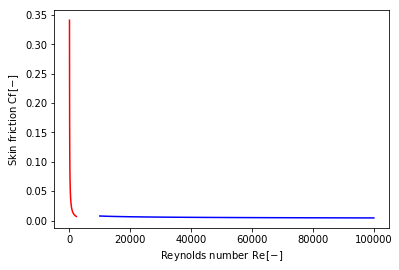

In [403]:
plt.plot(Re_lam, Cf_lam, color='red')
plt.plot(Re_turb, Cf_turb, color='blue')
plt.xlabel(r'Reynolds number Re$\,\mathrm{[-]}$')
plt.ylabel(r'Skin friction Cf$\,\mathrm{[-]}$')

In [404]:
#Christphan2018 thesis
#Gnielinski correlstion
#Nu_turb = ((Cf_turb * Re_turb * Pr / 2) / (1 + 12.7 * (Cf_turb / 2)**(1/2) * (Pr**(2/3) - 1))) * (Pr_b / Pr_w)**0.11
Nu_lam_c = (3.66**3 + 0.7**3 + (1.615 * (Re_lam * Pr * d / L)**(1/3))**3)**(1/3)

### Laminar flow_Uniform wall temperature (UWT)

In [405]:
Nu_1_uwt = 3.66
Nu_2_uwt = 1.615 * Gz**(1/3)
Nu_3_uwt = (2/(1 + 22*Pr))**(1/6) * Gz
Nu_lam_uwt = (Nu_1_uwt**3 + b + (Nu_2_uwt - b)**3 + Nu_3_uwt**3)**(1/3)

### Laminar flow_Uniform heat flux (UHF)

In [406]:
Nu_1_uhf = 4.364
Nu_2_uhf = 1.953 * Gz**(1/3)
Nu_3_uhf = 0.924 * Pr**(1/3) * (Re * d / L)**(1/2)
Nu_lam_uhf = (Nu_1_uhf**3 + b + (Nu_2_uhf - b)**3 + Nu_3_uhf**3)**(1/3)
print(Nu_lam_uhf)

[ 4.36877306  5.55803509  6.44336939  7.14779487  7.74134868  8.25916768
  8.72147638  9.14106902  9.52660187  9.88423209 10.21851192 10.53291225
 10.83014665 11.1123813  11.38137603 11.63858223 11.88521253 12.12229169
 12.35069436 12.57117377 12.78438374 12.99089586 13.19121307 13.38578049
 13.57499423 13.75920845 13.93874126 14.11387961 14.28488328 14.45198834
 14.61541002 14.77534512 14.93197418 15.08546319 15.23596525 15.3836218
 15.52856391 15.67091322 15.81078288 15.94827836 16.08349812 16.21653423
 16.34747296 16.47639526 16.60337717 16.72849027 16.85180199 16.97337594
 17.09327224 17.21154772]


### Turbulent flow

In [407]:
xi = (1.8 * np.log10(Re_turb) - 1.5)**(-2)
Nu_turb = ((xi/8 * Re_turb * Pr) / (1 + 12.7 * (xi/8)**0.5 * (Pr**(2/3) - 1))) * (1 + (d/L)**(2/3))
print(Nu_turb)

[ 147.654616    170.27179277  192.42964251  214.20297384  235.64689735
  256.80356506  277.70617494  298.38149393  318.85152343  339.13464103
  359.24640826  379.20015743  399.00742783  418.67829631  438.22163231
  457.64529745  476.95630403  496.16094226  515.26488372  534.27326605
  553.19076314  572.0216437   590.76982041  609.4388916   628.03217671
  646.55274672  665.00345031  683.38693657  701.70567472  719.96197137
  738.1579857   756.29574272  774.37714517  792.40398393  810.37794736
  828.30062965  846.17353828  863.99810071  881.77567044  899.50753246
  917.1949082   934.83895999  952.44079515  970.00146971  987.5219918
 1005.00332473 1022.44638987 1039.85206925 1057.22120795 1074.55461632]


### Transitional

In [411]:
#Re_bulk = 2300
#C = (Nu_1_uhf**3 + b + (Nu_2_uhf - b)**3 + Nu_3_uhf**3)**(1/3)
c1 = 17.21154772
c2 = 147.654616

In [412]:
r = (Re_b - 2300) / (10**4 - 2300)
Nu_tran = (1 - r) * c1 + r * c2
print(r)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


### Graph

Text(0,0.5,'Nusselt number Nu$\\,\\mathrm{[-]}$')

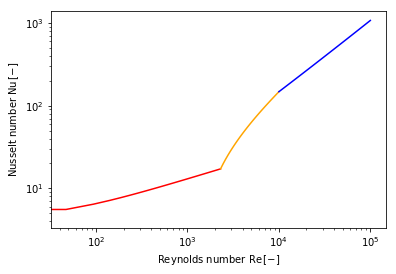

In [413]:
#plt.plot(Re_lam, Nu_lam_uwt, color='pink')
plt.loglog(Re_lam, Nu_lam_uhf, color='red')
#plt.plot(Re_lam, Nu_lam_c, color='black')
plt.loglog(Re_b, Nu_tran, color='orange')
plt.loglog(Re_turb, Nu_turb, color='blue')
plt.xlabel(r'Reynolds number Re$\,\mathrm{[-]}$')
plt.ylabel(r'Nusselt number Nu$\,\mathrm{[-]}$')
#plt.rcParams["font.size"] = 14
#OutPutFig = 'fig/density_rho.pdf'
#plt.tight_layout()
#plt.savefig(OutPutFig)